
테스트 파일 처리 중: 3f_looking01_1.csv
2/2 [==============================] - 1s 16ms/step


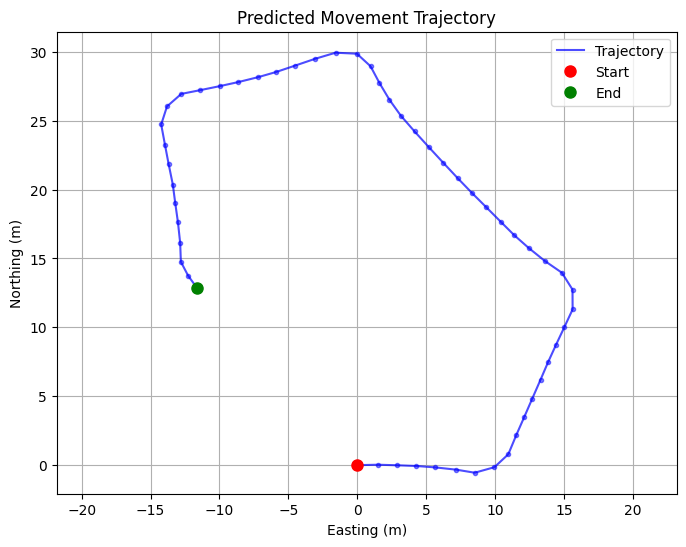


테스트 파일 처리 중: 3f_looking02_1.csv
2/2 [==============================] - 0s 16ms/step


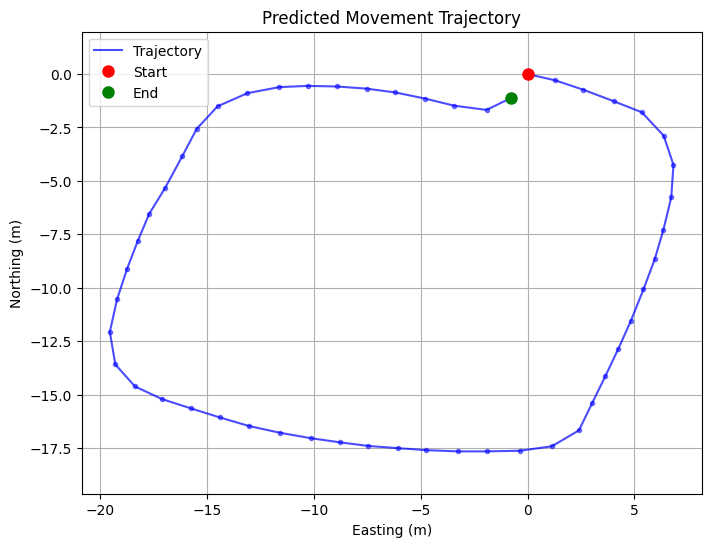


테스트 파일 처리 중: 3f_looking03.csv
2/2 [==============================] - 0s 0s/step


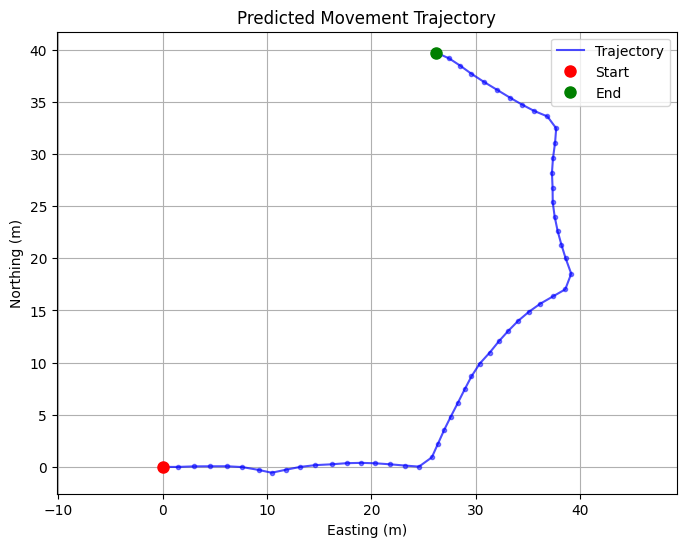


테스트 파일 처리 중: 3f_looking04.csv
2/2 [==============================] - 0s 16ms/step


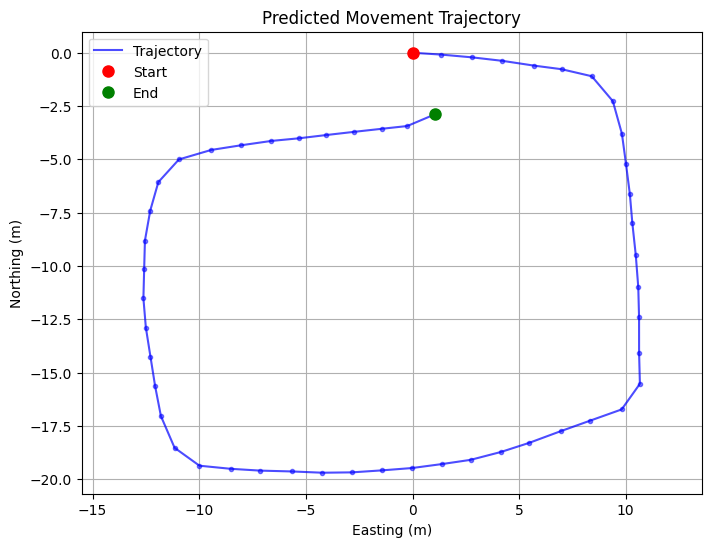


테스트 파일 처리 중: 3f_swing01.csv
2/2 [==============================] - 0s 16ms/step


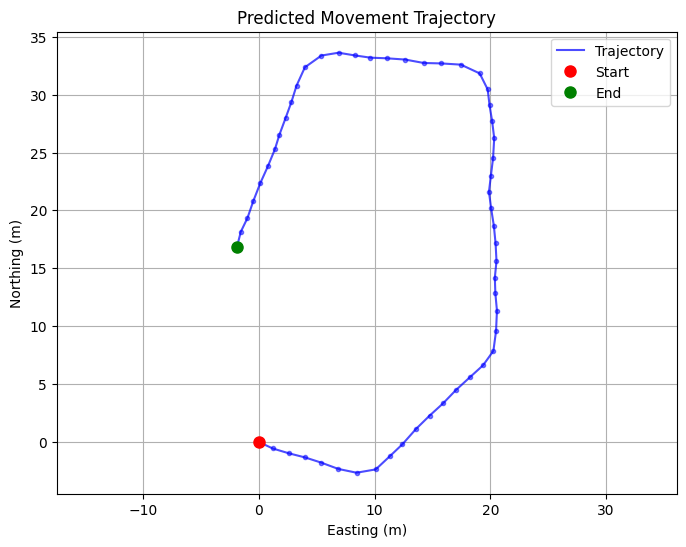


테스트 파일 처리 중: 3f_swing02.csv
2/2 [==============================] - 0s 0s/step


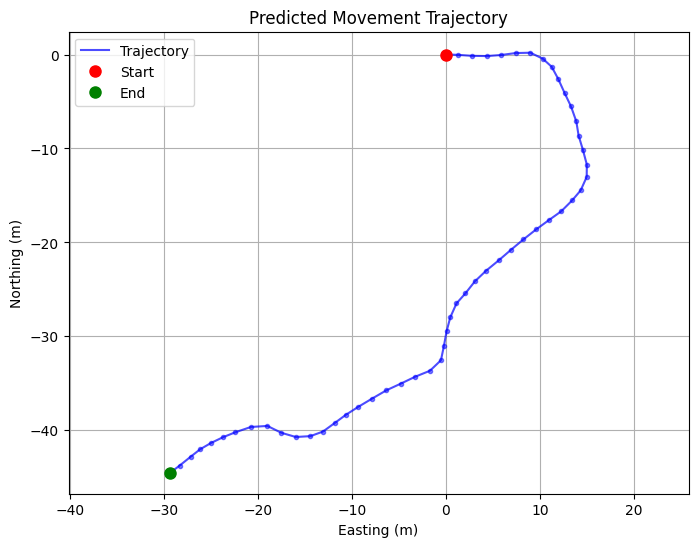


테스트 파일 처리 중: 3f_swing03.csv
2/2 [==============================] - 0s 16ms/step


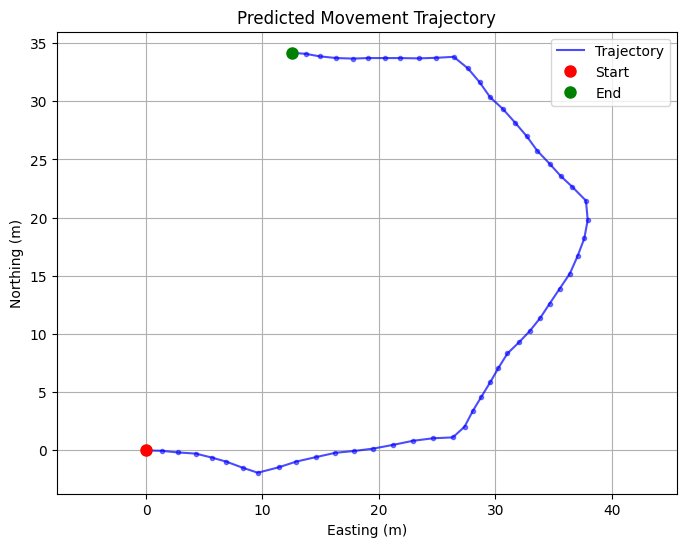


테스트 파일 처리 중: 3f_swing04.csv
2/2 [==============================] - 0s 0s/step


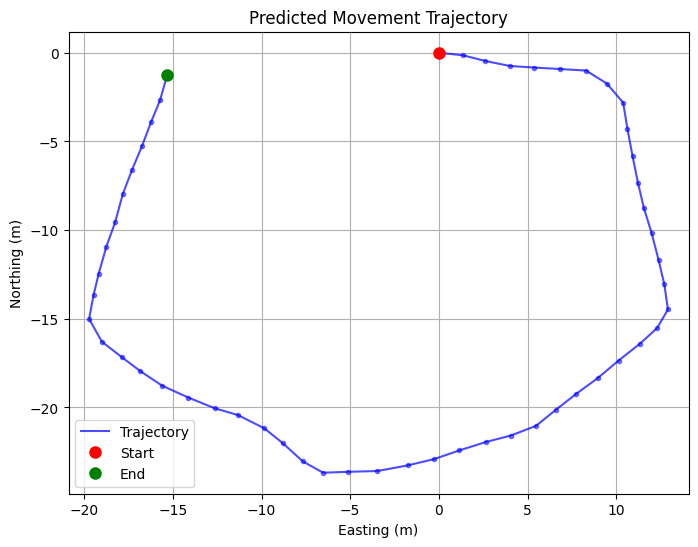

In [1]:
import os
import numpy as np
from src.data_processor import DataProcessor
from src.model_trainer import ModelTrainer
from src.trajectory_predictor import TrajectoryPredictor
import matplotlib.pyplot as plt
import joblib 

def main():
    # 현재 파일의 디렉토리를 기준으로 프로젝트 루트 경로 설정
    BASE_DIR = os.getcwd()
    
    # 저장된 모델과 스케일러 경로 설정
    model_path = os.path.join(BASE_DIR, 'saved_models', 'model_20250416_205015.h5')
    scaler_path = os.path.join(BASE_DIR, 'saved_models', 'scalers_20250416_205015.joblib')
    
    if not os.path.exists(model_path) or not os.path.exists(scaler_path):
        print("학습된 모델이나 스케일러를 찾을 수 없습니다. 먼저 모델을 학습해주세요.")
        return
    
    # ModelTrainer 인스턴스 생성
    trainer = ModelTrainer(window_size=50, num_features=13)
    
    # 모델 로드
    trainer.model = trainer.load_model(model_path)
    
    # 스케일러 로드
    # 스케일러 로드
    trainer.sensor_scalers = joblib.load(scaler_path)  
    

    predictor = TrajectoryPredictor(trainer.model, trainer.sensor_scalers)
    
    # 학습 데이터 경로
    learn_data_paths = [
        os.path.join(BASE_DIR, 'data', 'learn_data', 'Basket_1.csv'),
        os.path.join(BASE_DIR, 'data', 'learn_data', 'Basket_2.csv'),
        os.path.join(BASE_DIR, 'data', 'learn_data', 'Soccer_looking1.csv'),
        os.path.join(BASE_DIR, 'data', 'learn_data', 'Soccer_looking3.csv'),
        os.path.join(BASE_DIR, 'data', 'learn_data', 'Soccer_looking4.csv'),
        os.path.join(BASE_DIR, 'data', 'learn_data', 'Soccer_swing1.csv'),
        os.path.join(BASE_DIR, 'data', 'learn_data', 'Soccer_swing2.csv'),
        os.path.join(BASE_DIR, 'data', 'learn_data', 'Soccer_swing3.csv'),
        os.path.join(BASE_DIR, 'data', 'learn_data', 'Soccer_swing4.csv'),
        os.path.join(BASE_DIR, 'data', 'learn_data', 'Soccer_looking5m_01.csv'),
        os.path.join(BASE_DIR, 'data', 'learn_data', 'Soccer_looking5m_02.csv'),
        os.path.join(BASE_DIR, 'data', 'learn_data', 'Soccer_looking5m_03.csv'),
        os.path.join(BASE_DIR, 'data', 'learn_data', 'Soccer_swing5m_01.csv'),
        os.path.join(BASE_DIR, 'data', 'learn_data', 'Soccer_swing5m_02.csv'),
        os.path.join(BASE_DIR, 'data', 'learn_data', 'Soccer_swing5m_03.csv')
    ]


    
    # 각 학습 데이터 파일에 대해 다시 예측 수행
    for learn_data_path in learn_data_paths:
        if os.path.exists(learn_data_path):
            print(f"\n학습에 사용된 파일 처리 중: {os.path.basename(learn_data_path)}")
            
            # 학습에 사용된 데이터 로드 및 전처리
            df_learned = DataProcessor.load_and_preprocess_csv(learn_data_path, skiprows=300)
            
            # 예측 경로 시각화
            predictor.compare_trajectories(df_learned)
            
            # 그래프 표시
            plt.show()
            
        else:
            print(f"파일을 찾을 수 없습니다: {learn_data_path}")
    
    # 테스트 데이터 경로
    test_paths = [
        os.path.join(BASE_DIR, 'data', 'test_data', '3f_looking01_1.csv'),
        os.path.join(BASE_DIR, 'data', 'test_data', '3f_looking02_1.csv'),
        os.path.join(BASE_DIR, 'data', 'test_data', '3f_looking03.csv'),
        os.path.join(BASE_DIR, 'data', 'test_data', '3f_looking04.csv'),
        os.path.join(BASE_DIR, 'data', 'test_data', '3f_swing01.csv'),
        os.path.join(BASE_DIR, 'data', 'test_data', '3f_swing02.csv'),
        os.path.join(BASE_DIR, 'data', 'test_data', '3f_swing03.csv'),
        os.path.join(BASE_DIR, 'data', 'test_data', '3f_swing04.csv')
    ]
    
    # 각 테스트 파일에 대해 예측 수행
    for test_path in test_paths:
        if os.path.exists(test_path):
            print(f"\n테스트 파일 처리 중: {os.path.basename(test_path)}")
            
            # 테스트 데이터 로드 및 전처리
            df_test = DataProcessor.load_and_preprocess_csv(test_path, skiprows=100)
            
            # 예측 경로 시각화
            predictor.predict_and_plot_trajectory(df_test)
            
            # 그래프 표시
            plt.show()
            
        else:
            print(f"테스트 파일을 찾을 수 없습니다: {test_path}")

if __name__ == '__main__':
    main() 